# Preprocessing the Proba-V Dataset
![proba_v_dataset](media/proba_v_dataset.jpg "Logo Title Text 1")

The following notebook provides a very flexible pipeline for processing the Proba-V Dataset. We have already split the original dataset in train validation and test. The test set is the original one of the ESA Proba-V challenge without ground-truths. The validation set is composed of all the scenes we used to evaluate our network and all significant solutions presented in literature at the time of writing.

**NB**: with the setting "train_full=True" our validation split will be ignored, and you will have a pre-processed dataset with all scenes available in the dataset. It is useful if you want to compete in the [PROBA-V Super Resolution post mortem Challenge](https://kelvins.esa.int/proba-v-super-resolution-post-mortem/home/)

**The notebook is divided in**:
- 1.0 [Dataset Loading](#section_ID)
- 2.0 [Dataset pre-processing](#preprocessing)
    - 2.1 Register dataset
    - 2.2 Select the best T LR images
    - 2.3 Pre-augment dataset (temporal permutation)
- 3.0 [Visualize the Pre-Processed Datataset](#visualize)
- 4.0 [Save dataset](#save)

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [1]:
# import utils and basic libraries
from utils.preprocessing import load_dataset,select_T_images,register_dataset,augment_dataset
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#-------------
# Settings
#-------------
T = 9                                # number of temporal dimension
n_augment = 7                        # number of temporal permutations to augment the dataset
dataset_dir = 'probav_data'          # input dir (train val and test splitted)
dataset_output_dir = 'dataset'       # output dir
threshold_clean = 0.85               # percentage of clear pixel
train_full = False                   # train without a validation

<a id="loading"></a>
# 1.0 Dataset Loading

In [3]:
# train loading
X_RED_train, X_RED_train_masks, y_RED_train, y_RED_train_masks = load_dataset(base_dir=dataset_dir, 
                                                                              part="train", band="RED")
X_NIR_train, X_NIR_train_masks, y_NIR_train, y_NIR_train_masks = load_dataset(base_dir=dataset_dir,
                                                                              part="train", band="NIR")

print(f"Train RED scenes: {len(X_RED_train)} | Train RED y shape: {y_RED_train.shape}")
print(f"Train NIR scenes: {len(X_NIR_train)} | Train NIR y shape: {y_NIR_train.shape}")

  0%|          | 0/415 [00:00<?, ?it/s]

  0%|          | 0/396 [00:00<?, ?it/s]

Train RED scenes: 415 | Train RED y shape: (415, 384, 384, 1)
Train NIR scenes: 396 | Train NIR y shape: (396, 384, 384, 1)


In [4]:
# validation loading
X_RED_val, X_RED_val_masks, y_RED_val, y_RED_val_masks = load_dataset(base_dir=dataset_dir,
                                                                      part="val", band="RED")
X_NIR_val, X_NIR_val_masks, y_NIR_val, y_NIR_val_masks = load_dataset(base_dir=dataset_dir,
                                                                      part="val", band="NIR")

print(f"Val RED scenes: {len(X_RED_val)} | Val RED y shape: {y_RED_val.shape}")
print(f"Val NIR scenes: {len(X_NIR_val)} | Val NIR y shape: {y_NIR_val.shape}")

  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

Val RED scenes: 176 | Val RED y shape: (176, 384, 384, 1)
Val NIR scenes: 170 | Val NIR y shape: (170, 384, 384, 1)


In [5]:
# test loading
X_RED_test, X_RED_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="RED")
X_NIR_test, X_NIR_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="NIR")

print(f"Test RED scenes: {len(X_RED_test)}")
print(f"Test NIR scenes: {len(X_NIR_test)}")

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

Test RED scenes: 146
Test NIR scenes: 144


<a id="preprocessing"></a>
# 2.0 Dataset Pre-Processing

## 2.1 Register dataset

In [6]:
# train registration
X_RED_train, X_RED_train_masks = register_dataset(X_RED_train, X_RED_train_masks)
X_NIR_train, X_NIR_train_masks = register_dataset(X_NIR_train, X_NIR_train_masks)

  0%|          | 0/415 [00:00<?, ?it/s]

c:\Users\admin\Dropbox\Proximity Designs\Satellite\Super-resolution\RAMS\utils\preprocessing.py:154: FutureWarning: In scikit-image 0.22, phase_cross_correlation will start returning a tuple or 3 items (shift, error, phasediff) always. To enable the new return behavior and silence this warning, use return_error='always'.
  s = phase_cross_correlation(ref, x, reference_mask = m)


  0%|          | 0/396 [00:00<?, ?it/s]

In [7]:
# validation registration
X_RED_val, X_RED_val_masks = register_dataset(X_RED_val, X_RED_val_masks)
X_NIR_val, X_NIR_val_masks = register_dataset(X_NIR_val, X_NIR_val_masks)

  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

In [8]:
# test registration
X_RED_test, X_RED_test_masks = register_dataset(X_RED_test, X_RED_test_masks)
X_NIR_test, X_NIR_test_masks = register_dataset(X_NIR_test, X_NIR_test_masks)

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

## 2.2 Select the best T LR images

In [9]:
# select T train
X_RED_train, remove_indexes_RED_train = select_T_images(X_RED_train, X_RED_train_masks,
                                                                     T, thr=threshold_clean)
X_NIR_train, remove_indexes_NIR_train = select_T_images(X_NIR_train, X_NIR_train_masks, 
                                                                     T, thr=threshold_clean)

print(f"Train RED shape: {X_RED_train.shape}")
print(f"Train NIR shape: {X_NIR_train.shape}")
print(f"Train indexes removed RED: {remove_indexes_RED_train}")
print(f"Train indexes removed NIR: {remove_indexes_NIR_train}")

  0%|          | 0/415 [00:00<?, ?it/s]

  0%|          | 0/396 [00:00<?, ?it/s]

Removing number 48
Removing number 168
Removing number 222
Train RED shape: (415, 128, 128, 9)
Train NIR shape: (393, 128, 128, 9)
Train indexes removed RED: []
Train indexes removed NIR: [48, 168, 222]


In [10]:
# delete awful scenes training
y_RED_train = np.delete(y_RED_train, remove_indexes_RED_train, axis=0)
y_RED_train_masks = np.delete(y_RED_train_masks, remove_indexes_RED_train, axis=0)
y_NIR_train = np.delete(y_NIR_train, remove_indexes_NIR_train, axis=0)
y_NIR_train_masks = np.delete(y_NIR_train_masks, remove_indexes_NIR_train, axis=0)

print(f"Train RED y shape: {y_RED_train.shape}")
print(f"Train NIR y shape: {y_NIR_train.shape}")

Train RED y shape: (415, 384, 384, 1)
Train NIR y shape: (393, 384, 384, 1)


In [11]:
# select T validation
X_RED_val, remove_indexes_RED_val = select_T_images(X_RED_val, X_RED_val_masks, 
                                                                 T, thr=threshold_clean)
X_NIR_val, remove_indexes_NIR_val = select_T_images(X_NIR_val, X_NIR_val_masks,
                                                                 T, thr=threshold_clean)

print(f"Val RED shape: {X_RED_train.shape}")
print(f"Val NIR shape: {X_NIR_train.shape}")
print(f"Val indexes removed RED: {remove_indexes_RED_val}")
print(f"Val indexes removed NIR: {remove_indexes_NIR_val}")

  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

Val RED shape: (415, 128, 128, 9)
Val NIR shape: (393, 128, 128, 9)
Val indexes removed RED: []
Val indexes removed NIR: []


In [12]:
# delete awful scenes validation
y_RED_val = np.delete(y_RED_val, remove_indexes_RED_val, axis=0)
y_RED_val_masks = np.delete(y_RED_val_masks, remove_indexes_RED_val, axis=0)
y_NIR_val = np.delete(y_NIR_val, remove_indexes_NIR_val, axis=0)
y_NIR_val_masks = np.delete(y_NIR_val_masks, remove_indexes_NIR_val, axis=0)

print(f"Val RED y shape: {y_RED_val.shape}")
print(f"Val NIR y shape: {y_NIR_val.shape}")

Val RED y shape: (176, 384, 384, 1)
Val NIR y shape: (170, 384, 384, 1)


In [13]:
# select T test
X_RED_test, _ = select_T_images(X_RED_test, X_RED_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can't remove scenes from testing dataset
X_NIR_test, _ = select_T_images(X_NIR_test, X_NIR_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can only pick the best T
print(f"Test RED shape: {X_RED_test.shape}")
print(f"Test NIR shape: {X_NIR_test.shape}")

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

Test RED shape: (146, 128, 128, 9)
Test NIR shape: (144, 128, 128, 9)


## 2.3 Pre-augment dataset (temporal permutation)

In [14]:
if train_full:
    X_RED_train = np.concatenate((X_RED_train, X_RED_val))
    X_NIR_train = np.concatenate((X_NIR_train, X_NIR_val))
    
    y_RED_train = np.concatenate((y_RED_train, y_RED_val))
    y_NIR_train = np.concatenate((y_NIR_train, y_NIR_val))
    
    y_RED_train_masks = np.concatenate((y_RED_train_masks, y_RED_val_masks))
    y_NIR_train_masks = np.concatenate((y_NIR_train_masks, y_NIR_val_masks))

In [15]:
#training dataset only
X_RED_train, y_RED_train, y_RED_train_masks = augment_dataset(X_RED_train, y_RED_train,
                                                              y_RED_train_masks, n_augment=n_augment)
X_NIR_train, y_NIR_train, y_NIR_train_masks = augment_dataset(X_NIR_train, y_NIR_train,
                                                              y_NIR_train_masks, n_augment=n_augment)

print(f"Train RED X shape: {X_RED_train.shape} | Train RED y shape: {y_RED_train.shape}")
print(f"Train NIR X shape: {X_NIR_train.shape} | Train NIR y shape: {y_NIR_train.shape}")

  0%|          | 0/415 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

Train RED X shape: (2905, 128, 128, 9) | Train RED y shape: (2905, 384, 384, 1)
Train NIR X shape: (2751, 128, 128, 9) | Train NIR y shape: (2751, 384, 384, 1)


<a id="visualize"></a>
# 3.0 Visualize the Pre-Processed Datataset

In [16]:
#-------------
# Settings
#-------------
index = 30
band = 'NIR'

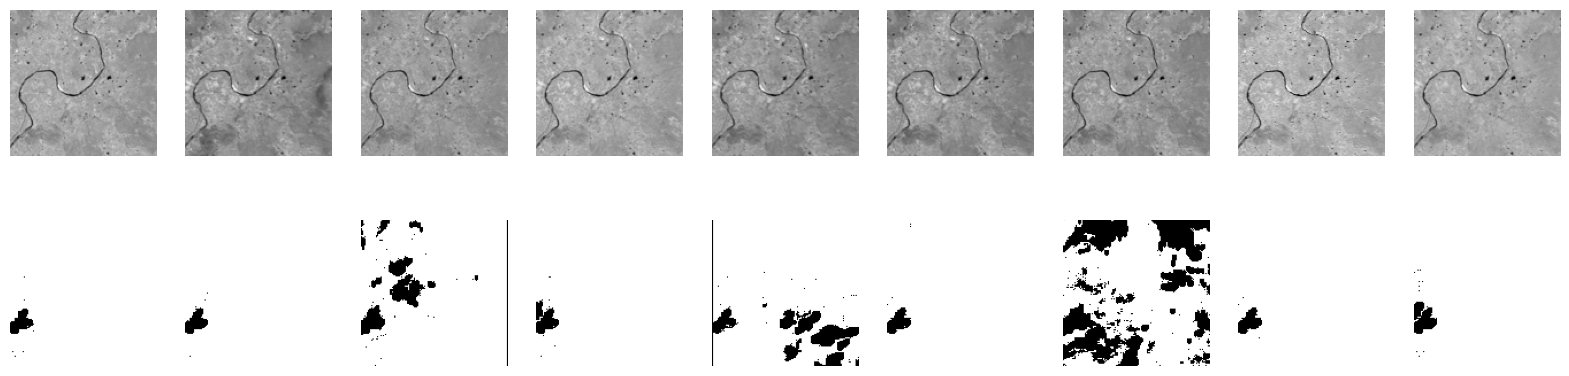

In [17]:
fig, ax = plt.subplots(2, T, figsize=(20,5))

if band == "NIR":
    for i in range(T):
        ax[0,i].imshow(X_NIR_train[index][...,i], cmap = 'gray')
        ax[0,i].axis('off')
        ax[1,i].imshow(X_NIR_train_masks[index][...,i], cmap = 'gray')
        ax[1,i].axis('off')
else:
    for i in range(T):
        ax[0,i].imshow(X_RED_train[index][...,i], cmap = 'gray')
        ax[0,i].axis('off')
        ax[1,i].imshow(X_RED_train_masks[index][...,i], cmap = 'gray')
        ax[1,i].axis('off')

<a id="save"></a>
# 4.0 Save dataset

In [18]:
if not os.path.isdir(dataset_output_dir):
    os.mkdir(dataset_output_dir)

In [19]:
# save training
np.save(os.path.join(dataset_output_dir, 'X_RED_train.npy'), X_RED_train)
np.save(os.path.join(dataset_output_dir, 'X_NIR_train.npy'), X_NIR_train)

np.save(os.path.join(dataset_output_dir, 'y_RED_train.npy'), y_RED_train)
np.save(os.path.join(dataset_output_dir, 'y_NIR_train.npy'), y_NIR_train)

np.save(os.path.join(dataset_output_dir, 'y_RED_train_masks.npy'), y_RED_train_masks)
np.save(os.path.join(dataset_output_dir, 'y_NIR_train_masks.npy'), y_NIR_train_masks)

In [ ]:
# save validation
if not train_full:
    np.save(os.path.join(dataset_output_dir, 'X_RED_val.npy'), X_RED_val)
    np.save(os.path.join(dataset_output_dir, 'X_NIR_val.npy'), X_NIR_val)

    np.save(os.path.join(dataset_output_dir, 'y_RED_val.npy'), y_RED_val)
    np.save(os.path.join(dataset_output_dir, 'y_NIR_val.npy'), y_NIR_val)

    np.save(os.path.join(dataset_output_dir, 'y_RED_val_masks.npy'), y_RED_val_masks)
    np.save(os.path.join(dataset_output_dir, 'y_NIR_val_masks.npy'), y_NIR_val_masks)

In [ ]:
# save test
np.save(os.path.join(dataset_output_dir, 'X_RED_test.npy'), X_RED_test)
np.save(os.path.join(dataset_output_dir, 'X_NIR_test.npy'), X_NIR_test)